# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# Check Data Information

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.shape

(28242, 7)

# Check Missing Values

In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


# Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(2310)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


# Transforming average_rain_fall_mm_per_year

In [13]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [14]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [15]:
df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

Index([], dtype='int64')

In [16]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [17]:
df = df.drop(to_drop)

In [18]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


# Graph frequency vs Area

<Axes: xlabel='count', ylabel='Area'>

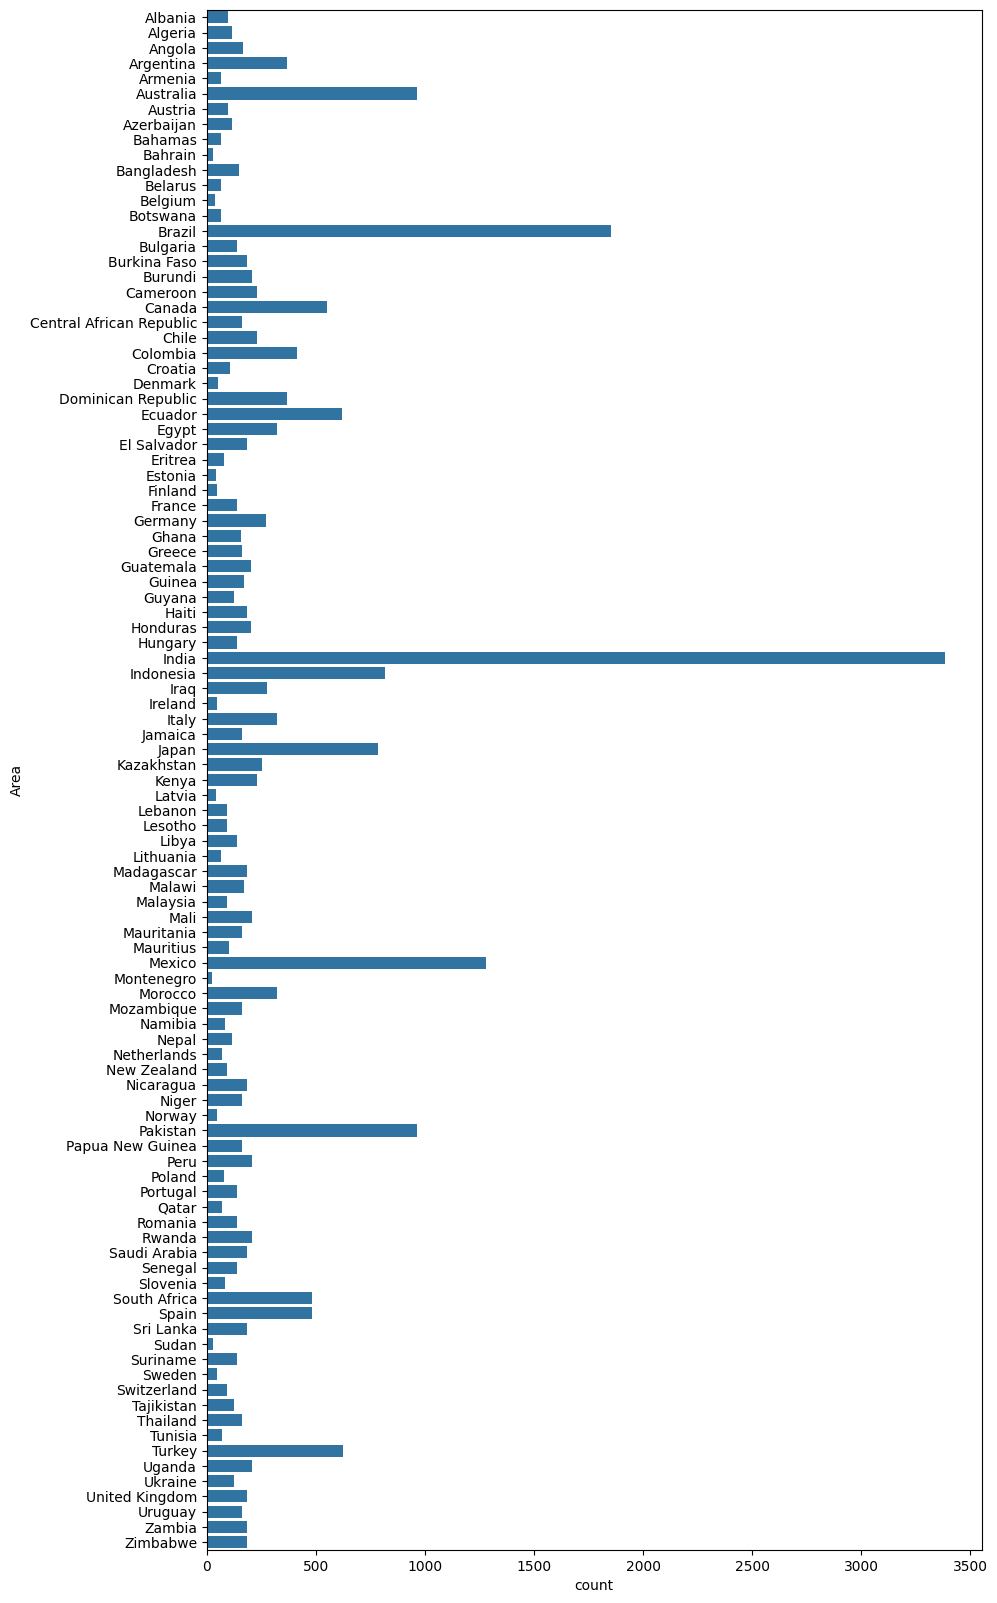

In [20]:
plt.figure(figsize = (10,20))
sns.countplot(y = df['Area'])

# Yield_per_country

In [21]:
len(df['Area'])

25932

In [22]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [23]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

In [24]:
yield_per_country

[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(7720159),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(136340329),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(274219558),
 np.int64(68067328),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(10092

# Yield Per Country Graph

<Axes: >

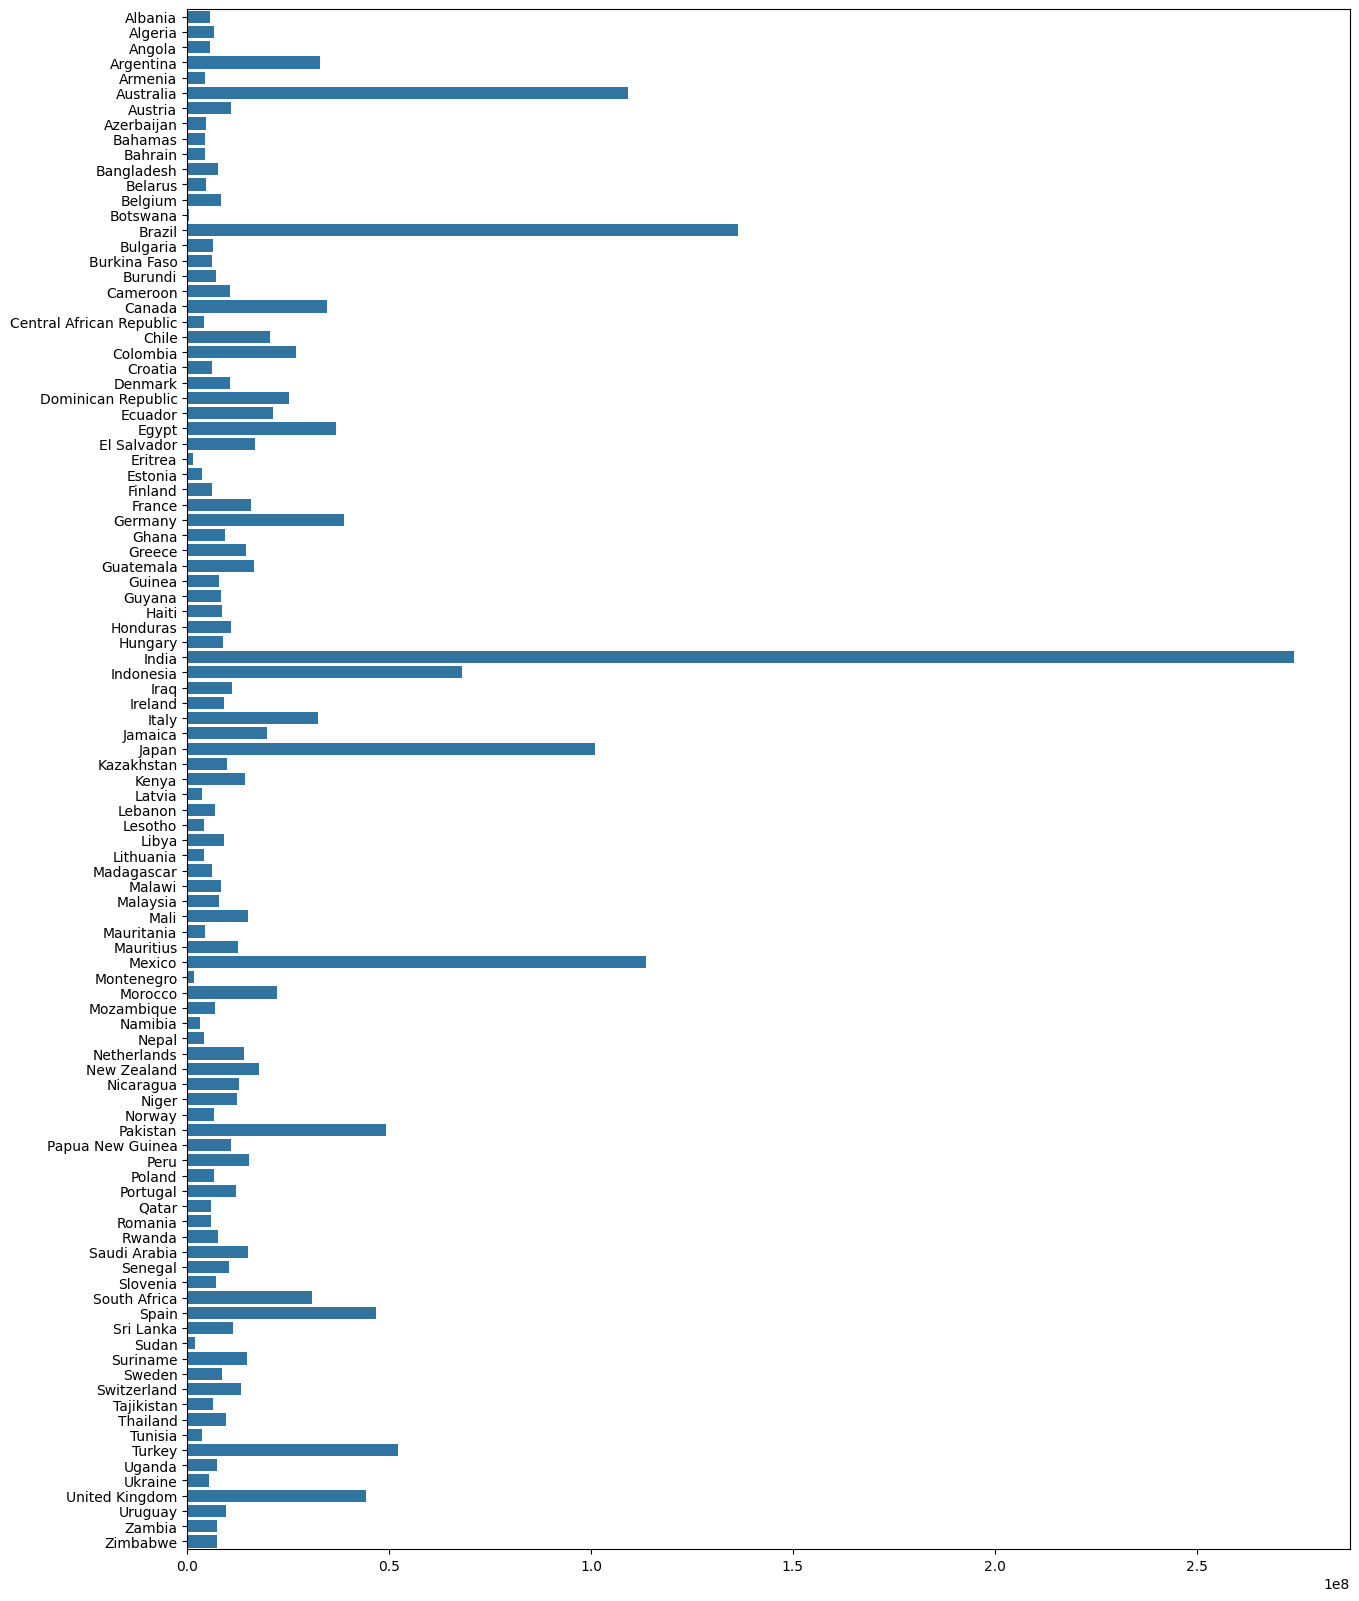

In [25]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Item Classification

In [26]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item'>

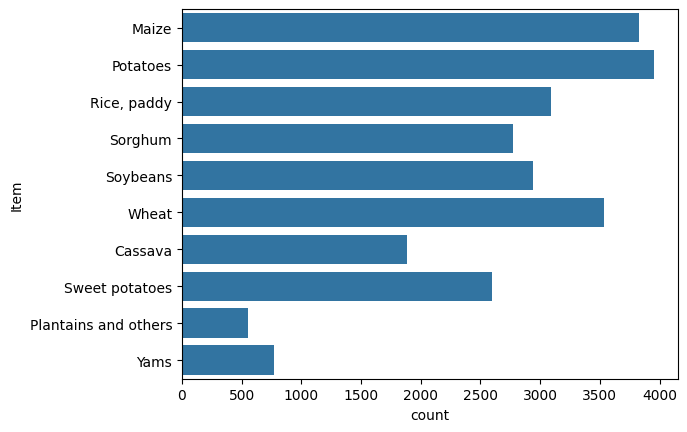

In [27]:
sns.countplot(y=df['Item'])

# Yield vs Item

In [28]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

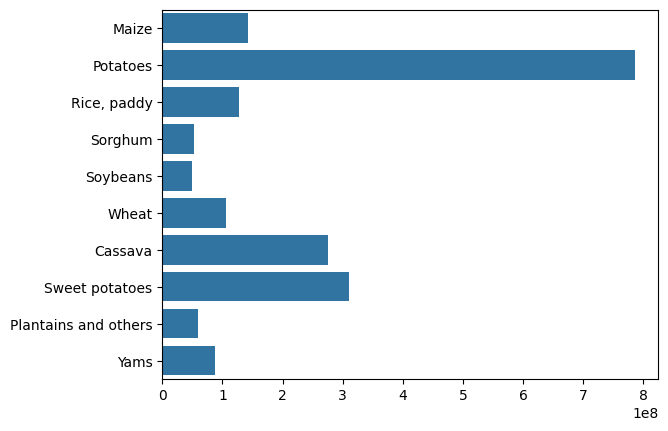

In [29]:
sns.barplot(y=crops,x=yield_per_crop)

# Exploratory Data Analysis (EDA)

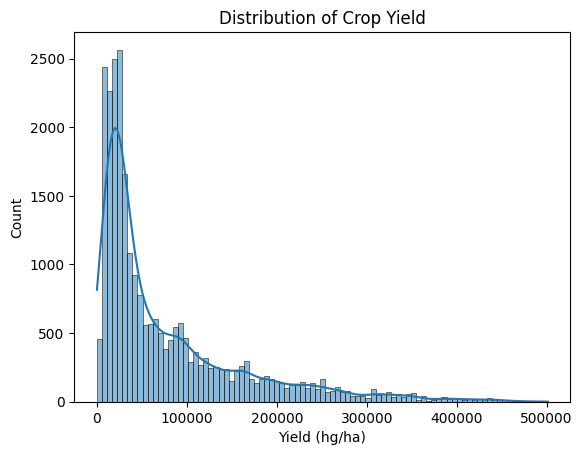

In [31]:
sns.histplot(df['hg/ha_yield'], kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (hg/ha)")
plt.show()

# Line Plot

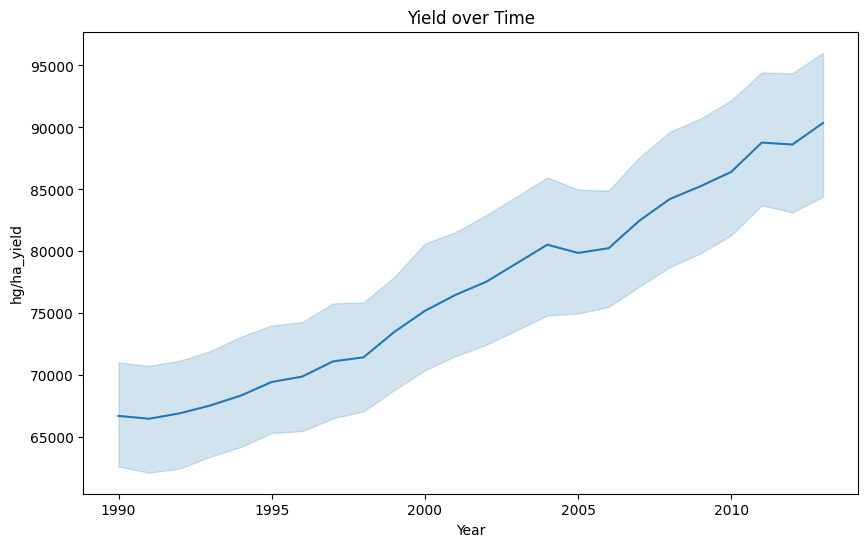

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='hg/ha_yield')
plt.title('Yield over Time')
plt.show()

# Histogram for numerical columns

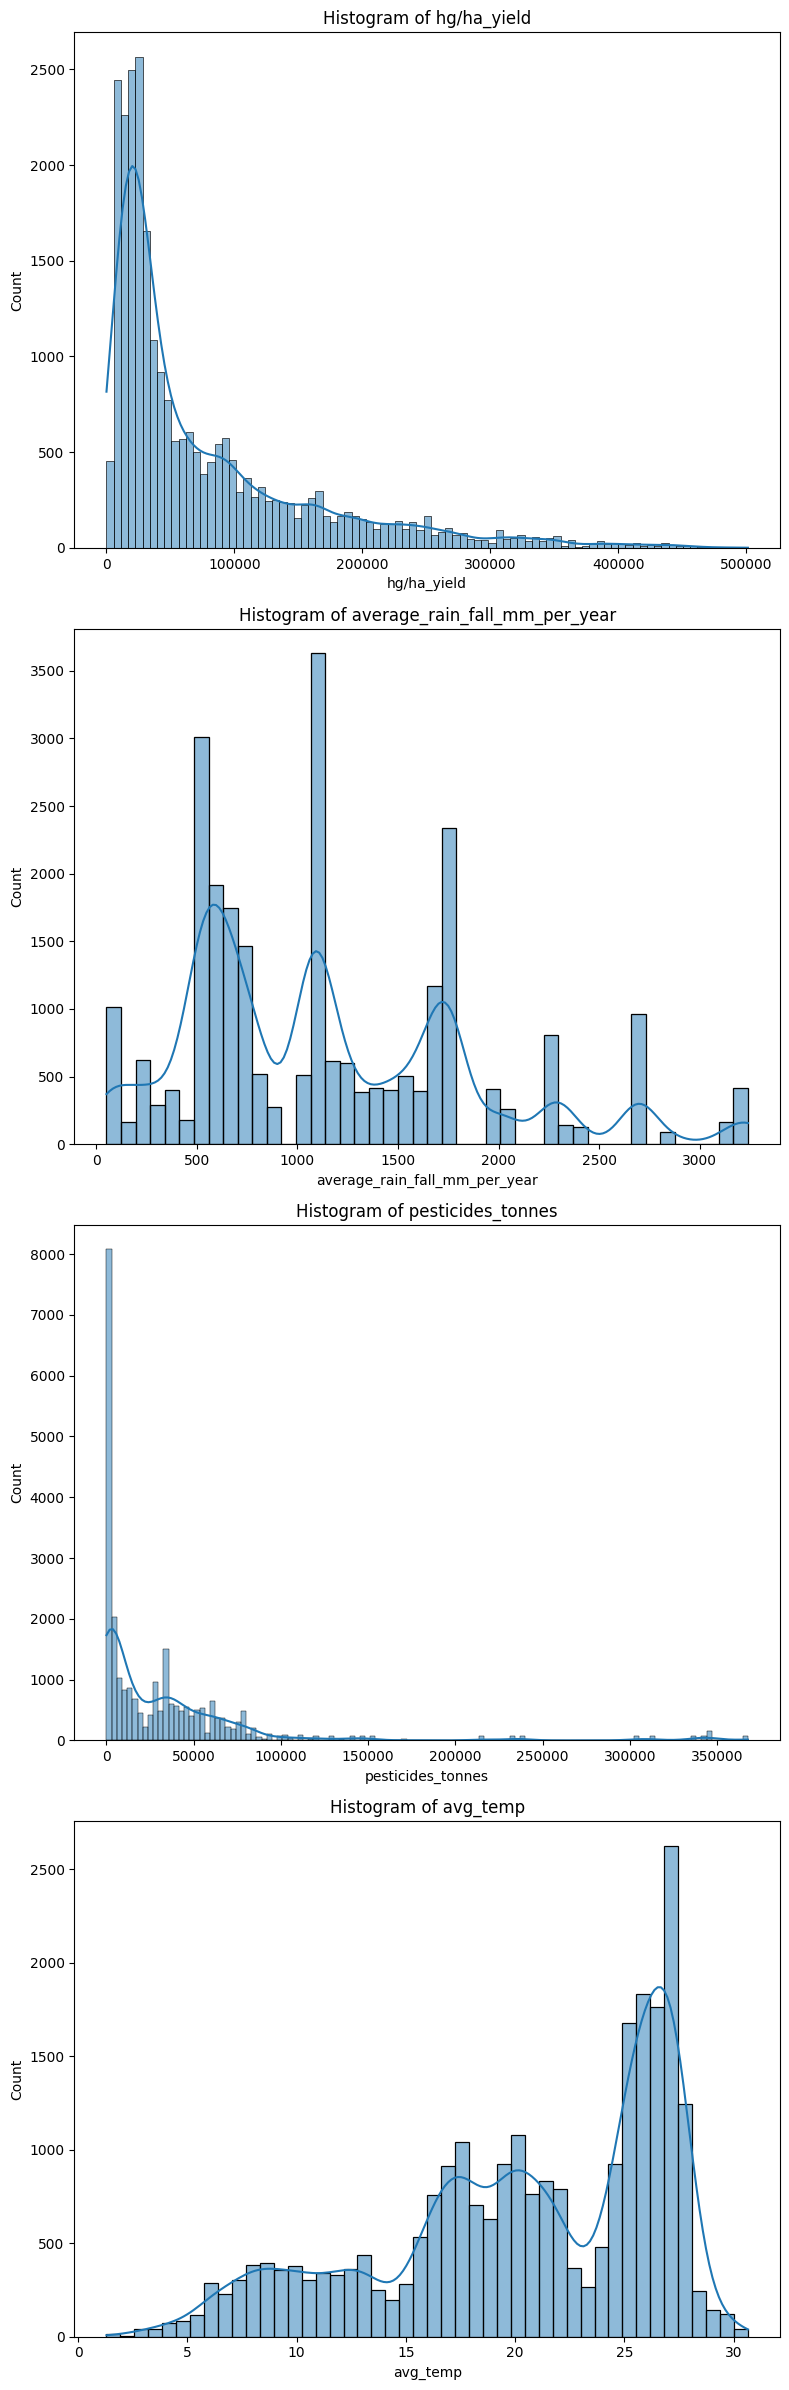

In [40]:
numerical_cols = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

fig, axs = plt.subplots(len(numerical_cols), figsize=(8, 6*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axs[i], kde=True)
    axs[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

# Scatter Plot

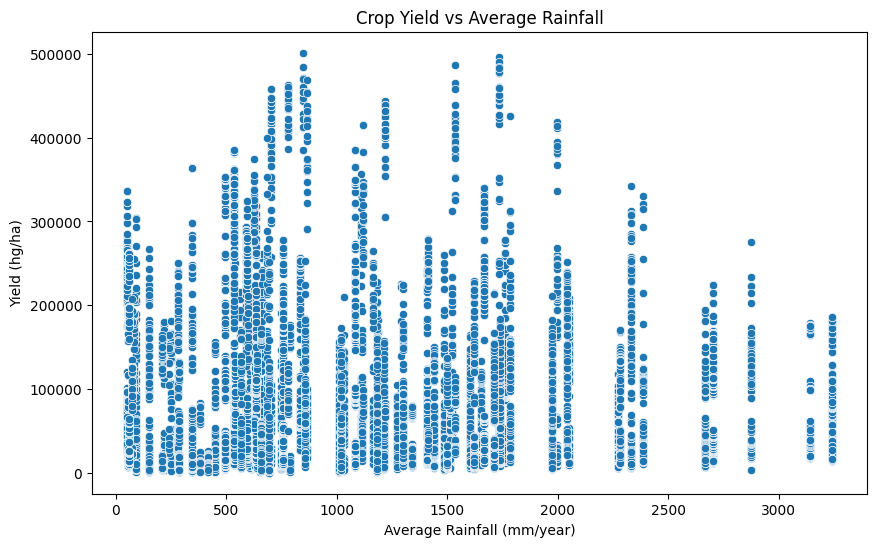

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df)
plt.title("Crop Yield vs Average Rainfall")
plt.xlabel("Average Rainfall (mm/year)")
plt.ylabel("Yield (hg/ha)")
plt.show()

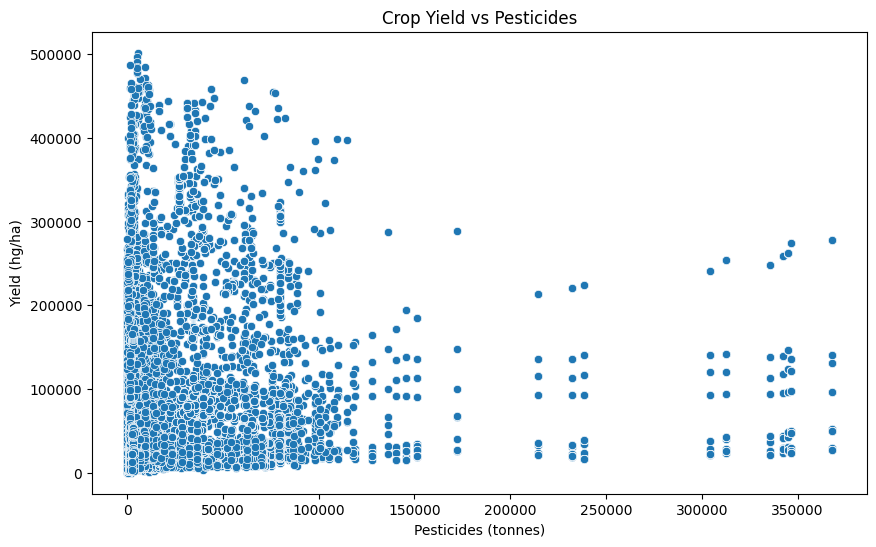

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=df)
plt.title("Crop Yield vs Pesticides")
plt.xlabel("Pesticides (tonnes)")
plt.ylabel("Yield (hg/ha)")
plt.show()


# Correlation heatmap

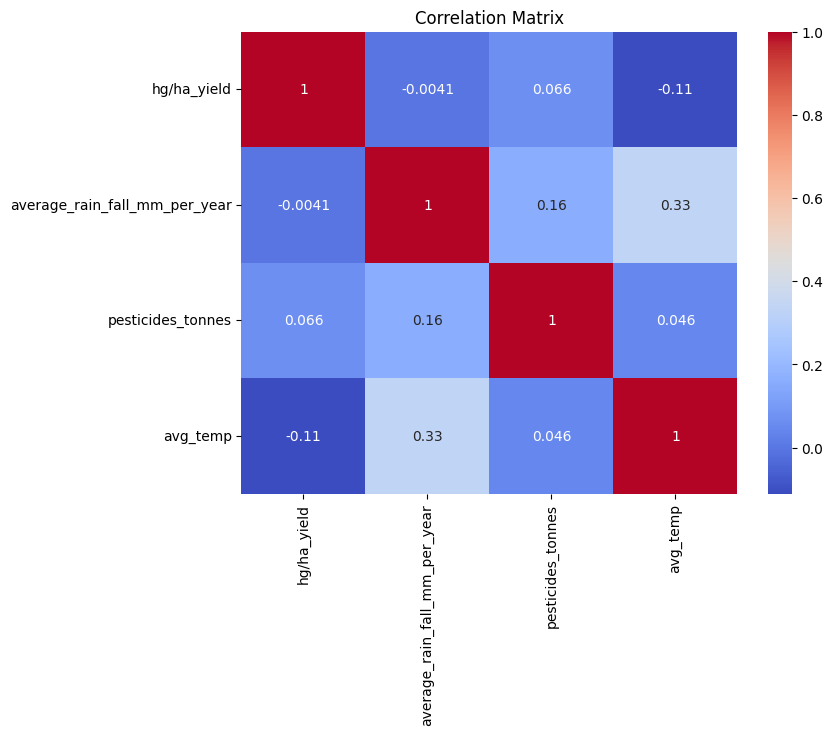

In [36]:
corr_matrix = df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Train Test Split Rearranging Columns

In [41]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [42]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [45]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [46]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Train our models

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.468102517512 score : 0.7473130510163484
Dtr : mae : 3892.582032003085 score : 0.9802332814122798


# Select the best model

In [48]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 23035., 34879., 79048.], shape=(5187,))

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Binarize the target variable (example threshold: median)
threshold = y_test.median()
y_test_bin = (y_test > threshold).astype(int)
y_pred = dtr.predict(X_test_dummy)
y_pred_bin = (y_pred > threshold).astype(int)

print(f'DTR Metrics:')
print(f'Accuracy: {accuracy_score(y_test_bin, y_pred_bin)}')
print(f'Precision: {precision_score(y_test_bin, y_pred_bin)}')
print(f'Recall: {recall_score(y_test_bin, y_pred_bin)}')
print(f'F1 Score: {f1_score(y_test_bin, y_pred_bin)}')

DTR Metrics:
Accuracy: 0.9816849816849816
Precision: 0.983733539891557
Recall: 0.9795603548013884
F1 Score: 0.9816425120772947


# Predictive System

In [52]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a dataframe with the input features
    input_df = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(input_df)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features)

    return predicted_yield[0]

In [53]:
result

array([36613.])

# Test the model 

In [54]:
Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'

result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print(f'Predicted Yield: {result}')

Predicted Yield: 36613.0


In [55]:
inputs = [
    {'Year': 1990, 'average_rain_fall_mm_per_year': 1485.0, 'pesticides_tonnes': 121.00, 'avg_temp': 16.37, 'Area': 'Albania', 'Item': 'Maize'},
    {'Year': 1991, 'average_rain_fall_mm_per_year': 1500.0, 'pesticides_tonnes': 130.00, 'avg_temp': 17.00, 'Area': 'Albania', 'Item': 'Wheat'},
    {'Year': 1992, 'average_rain_fall_mm_per_year': 1400.0, 'pesticides_tonnes': 110.00, 'avg_temp': 15.50, 'Area': 'Bulgaria', 'Item': 'Maize'}
]

for inp in inputs:
    result = prediction(inp['Year'], inp['average_rain_fall_mm_per_year'], inp['pesticides_tonnes'], inp['avg_temp'], inp['Area'], inp['Item'])
    print(f"Year: {inp['Year']}, Area: {inp['Area']}, Item: {inp['Item']}, Predicted Yield: {result}")

Year: 1990, Area: Albania, Item: Maize, Predicted Yield: 36613.0
Year: 1991, Area: Albania, Item: Wheat, Predicted Yield: 20000.0
Year: 1992, Area: Bulgaria, Item: Maize, Predicted Yield: 29068.0


# Pickle Files

In [56]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [58]:
import sklearn
print(sklearn.__version__)

1.7.1
